## Importing Libraries

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# For Numerical Result Purpose
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# For Exctracting Results Using MACHINE LEARNING ALGORITHMS
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import OneClassSVM

# Internal Requirements
import warnings
warnings.filterwarnings('ignore')
import sys

### Function to obtain TRUE POSITIVE, FALSE POSITIVE, TRUE NEGATIVE & FALSE NEGATIVE

In [2]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1

    return TP, FP, TN, FN

### Funtion to avoid error 1/0

In [3]:
def foo(tp,fp):
    try:
        return tp/(tp+fp)
    except ZeroDivisionError:
        return 0
    
def foo2(tp,fn):
    try:
        return tp/(tp+fn)
    except ZeroDivisionError:
        return 0
    
def foo3(tn,fp):
    try:
        return tn/(tn+fp)
    except ZeroDivisionError:
        return 0
    
def foo4(tp,tn,fp,fn):
    try:
        return (tp + tn)/(tp + tn + fp + fn)
    except ZeroDivisionError:
        return 0

## Loading & Manipulating the Data 

In [4]:
# # loadData Function receives 5 values
#     1. 'train' that represents the TRAINING DATA
#     2. 'test' that represents TESTING DATA
#     3. 'components' that represent the number of components taken into consideration for Incremental PCA
#     4. 'names' represent the Name of the Dataset
#     5. 'b_size' represents the Batch Size

def loadData(train, test, names):
    
    # Creating numpy arrays from pandas
    data_train_np = train.values
    data_test_np=test.values

    # Separating the Data into X_train, Y_train, X_test, Y_test
    X_train=data_train_np[:,1:]
    Y_train=data_train_np[:,0]
    X_test=data_test_np[:,1:]
    Y_test=data_test_np[:,0]
    
    # Formatting Y_train and Y_test in np.int32 format
    Y_train=Y_train.astype(np.int32)
    Y_test=Y_test.astype(np.int32)
    
    # Creation of an Empty List
    y_train_list=[]
    
#---------------------------------------NOTE----------------------------

# things to change for positive = 1 or 0
#     1. final_y_train
#     2. nu parameter

#------------------------------------------------------------------------

# WHEN POSITIVE = 1 (That means when we take the positive class to be 1)   
    for i in Y_train:
        if i!=1:
            y_train_list.append(0)         # Appending 0 in the y_train list if the class is not 1   
        else:
            y_train_list.append(1)         # Appending 1 in the y_train list if the class is 1
            
            
            
# # WHEN POSITIVE = 0 (That means when we take the positive class to be 0)
#     for i in Y_train:
#         if i!=1:
#             y_train_list.append(1)       # Appending 1 in the y_train list if the class is not 1  
#         else:
#             y_train_list.append(0)       # Appending 0 in the y_train list if the class is 1  
            
##-------------------------------------------------------------------------------------------------------
    
    # Choose a positive class
    positive = 1  
    
    # Converting y_train_list to numpy array
    final_y_train=np.array(y_train_list)    
    
    # Formatting X_train such that it has values for Y_train equal to positive class
    X_train = X_train[(final_y_train == positive)]
    
    # Formatting Y_test in BOOLEAN FORMAT
    Y_test = (Y_test == positive).astype(np.int8)
    
    return X_train, final_y_train, X_test, Y_test, positive

## Setting-Up IPCA Parameters

In [5]:
def IPCAResults(X_train, X_test, Y_test, components, b_size):

# Selecting IPCA COMPONENTS
    ipca = IncrementalPCA(n_components = components, batch_size = b_size)
    X_ipca_train = ipca.fit_transform(X_train)
    X_ipca_test = ipca.fit_transform(X_test)


# Creating Graphs to observe the Separation of Data using IPCA in 2-D
    if components==2:  
        X_ipca_test_inverse = ipca.inverse_transform(X_ipca_test)
        plt.scatter(X_ipca_test_inverse[:,0], X_ipca_test_inverse[:,1] ,c=Y_test, cmap='RdBu')
        plt.xlabel("Component 1")
        plt.ylabel('Component 2')
        plt.colorbar();
        plt.title("Inverse Transformation")
        plt.show()
        
    if components == 2:
        plt.scatter(X_ipca_test[:, 0], X_ipca_test[:, 1], edgecolor='none', alpha=0.7, c=Y_test,cmap='RdBu')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.title("Separation of Data Points")
        plt.grid()
        plt.colorbar();
        plt.show()
    
    return X_ipca_train, X_ipca_test

## Implementing OneClassSVM

In [8]:
def OneClasssvm(x_train, x_test, y_test, y_train, component):

#     test_clf = OneClassSVM( nu=0.003, gamma= 'scale') #POSITIVE = 0, IPCA
    test_clf = OneClassSVM( nu=0.006, gamma= 'scale') #POSITIVE = 1, IPCA
    
    # Fitting X_train
    test_clf.fit(x_train) 

    # Obtaining prediction results
    y_predict = test_clf.predict(x_test) 
    
    # Creating Prediction numpy array
    predict=[]
    for i in y_predict:
        if i!= 1:
            predict.append(0)
        else:
            predict.append(1)

    final_predict=np.array(predict)

    
    # Obtaining scores 
    score = test_clf.score_samples(x_test)
    
    # Calculating AUROC score
    fpr1, tpr1, _ = roc_curve(y_test,score,pos_label=1)
    AUROC1 = auc(fpr1, tpr1) * 100
    
    # Printing AUROC score
    print()
    print('Component Value: ', component,"    ",'AUROC score: ', round(AUROC1,2))

    return final_predict

## RESULTS

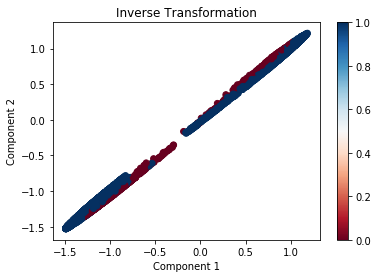

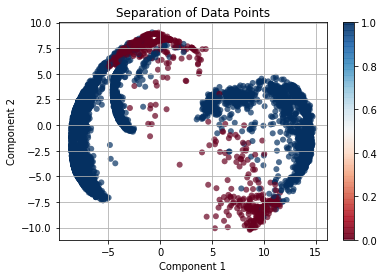


Component Value:  2      AUROC score:  94.09
False Negatives: 1219     False Positives: 60
Total Positives: 5499     Total Negatives: 665

Component Value:  4      AUROC score:  86.79
False Negatives: 2428     False Positives: 85
Total Positives: 5499     Total Negatives: 665

Component Value:  6      AUROC score:  91.56
False Negatives: 2304     False Positives: 54
Total Positives: 5499     Total Negatives: 665

Component Value:  8      AUROC score:  90.46
False Negatives: 2538     False Positives: 53
Total Positives: 5499     Total Negatives: 665

Component Value:  10      AUROC score:  87.92
False Negatives: 2990     False Positives: 62
Total Positives: 5499     Total Negatives: 665

Accuracy scores:-
{'Wafer': {2: 0.79, 4: 0.59, 6: 0.62, 8: 0.58, 10: 0.5}}

Precision scores:-
{'Wafer': {2: 0.99, 4: 0.97, 6: 0.98, 8: 0.98, 10: 0.98}}

Sensitivity/Recall scores:-
{'Wafer': {2: 0.78, 4: 0.56, 6: 0.58, 8: 0.54, 10: 0.46}}

Speificity scores:-
{'Wafer': {2: 0.91, 4: 0.87, 6: 0.92, 8: 0

In [9]:
# Number of Components for which Results are obtained for
components = [2,4,6,8,10]

# Creation of Dictionaries to store Results for RECALL, PRECISION, SPECIFICITY and ACCURACY values
recall={}
precision={}
specificity={}
accuracy={}


# Selecting the Dataset
datasets=['Wafer']

data_train_names=['Wafer_TRAIN.csv']

data_test_names=['Wafer_TEST.csv']

base_string='C:/Users/Sukriti Macker/IIIT Alahabad/Test Runs/Univariate2018_arff/'

# Obtaining the final results
for j, k, l in zip(data_train_names, data_test_names,datasets):

    if l not in recall:
        recall[l]={}

    if l not in precision:
        precision[l]={}

    if l not in specificity:
        specificity[l]={}

    if l not in accuracy:
        accuracy[l]={}


    for i in components:

        data_train = pd.read_csv(base_string + j, header=None, delim_whitespace=True) # Loading Training Data through Pandas

        data_test = pd.read_csv(base_string + k, header=None, delim_whitespace=True) # Loading Testing Data through Pandas

        X_train, y_train, X_test, Y_test, positive = loadData(data_train, data_test, l) # Obtaining X_train, Y_train, X_test, Y_test and Positive
        
        X_ipca_train, X_ipca_test = IPCAResults(X_train, X_test, Y_test, i, 32) # Obtaining IPCA Results for X_train & X_test
        
        y_predict_final = OneClasssvm(X_ipca_train, X_ipca_test, Y_test, y_train, i) # Applying OneClassSVM

        tp, fp, tn, fn = perf_measure(Y_test, y_predict_final) # Obtaining values for True Positive, False Positive, True Negative, False Negative

        # To avoid errors due to 1/0 results
        precision_= foo(tp,fp)
        recall_sensitivity= foo2(tp,fn)
        specificity_= foo3(tn,fp)
        accuracy_ = foo4(tp,tn,fp,fn)

        if i not in recall[l]:
            recall[l][i] = round(recall_sensitivity,2) # Obtaining results for Recall Values for each component

        if i not in precision[l]:
            precision[l][i] = round(precision_,2) # Obtaining results for Precision Values for each component

        if i not in accuracy[l]:
            accuracy[l][i] = round(accuracy_,2) # Obtaining results for Accuracy Values for each component

        if i not in specificity[l]:
            specificity[l][i] = round(specificity_,2) # Obtaining results for Specificity Values for each component

            
# Printing ALL THE RESULTS

        print('False Negatives:',fn,"   ", 'False Positives:',fp)
        print('Total Positives:',tp+fn,"   ","Total Negatives:",fp+tn)

    print()
    print('Accuracy scores:-')
    print(accuracy)
    print()
    print('Precision scores:-')
    print(precision)
    print()
    print('Sensitivity/Recall scores:-')
    print(recall)
    print()
    print('Speificity scores:-')
    print(specificity)

print()
print()
print('POSITVE CLASS: ', positive)      # Print the Positive Class

print('Dataset: ', 'Wafer')   # Printing the name of the Dataset